<a href="https://colab.research.google.com/github/arnautoleg/Baby/blob/main/Bland_Altman_Sample_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://rowannicholls.github.io/python/statistics/agreement/bland_altman_sample_size.html

# https://igormintz.medium.com/the-bland-altman-plot-agreement-between-two-numerical-measurements-with-python-5504c38397c1

# https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362

# https://github.com/nwisn/blandPower

In [ ]:
# https://rowannicholls.github.io/python/statistics/agreement/bland_altman_sample_size.html

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [13]:
# Pilot test data from Zhou et al (2011)
dct = {
    'Measurement 1 (mmol/L)': [
        0.023, 0.022, 0.025, 0.013, 0.008, 0.017, 0.026, 0.017,
        0.034, 0.007, 0.011, 0.006, 0.001, 0.006, 0.005, 0.007,
        0.011, 0.002, 0.037, 0.002, 0.003, 0.013, 0.008, 0.023,
    ],
    'Measurement 2 (mmol/L)': [
        0.021, 0.023, 0.024, 0.013, 0.007, 0.016, 0.022, 0.016,
        0.032, 0.006, 0.009, 0.004, 0.001, 0.007, 0.003, 0.005,
        0.009, 0.002, 0.036, 0.001, 0.001, 0.011, 0.007, 0.023,
    ],
}
df = pd.DataFrame(dct)

print(df.head())


   Measurement 1 (mmol/L)  Measurement 2 (mmol/L)
0                   0.023                   0.021
1                   0.022                   0.023
2                   0.025                   0.024
3                   0.013                   0.013
4                   0.008                   0.007


In [15]:
# Acceptance criterion
δ = 0.004  # mmol/L

In [16]:
# Raw data
measurement1 = df['Measurement 1 (mmol/L)']
measurement2 = df['Measurement 2 (mmol/L)']
# Means
means = (measurement1 + measurement2) / 2
# Differences
diffs = measurement1 - measurement2
# Average difference (aka the bias)
bias = np.mean(diffs)
# Sample standard deviation
s = np.std(diffs, ddof=1)  # Use ddof=1 to get the sample standard deviation

print(f'Bias = {round(bias, 6)}, standard deviation = {round(s, 6)}')


Bias = 0.001167, standard deviation = 0.001129


In [6]:
# Level of agreement
agreement = 0.95  # 95%
# Limits of agreement (LOAs)
loas = st.norm.interval(agreement, bias, s)

print(f'The LOAs are {round(loas[0], 6)} and {round(loas[1], 6)}')


The LOAs are -0.001047 and 0.00338


In [7]:
# Confidence level
confidence = 0.99  # 99%
# Significance level, α
alpha = 1 - confidence
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Sample size
n = len(df)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution
t_star = st.t.ppf(q, dof)
# Standard error of the LOAs
se_loas = np.sqrt(3 * s**2 / n)
# Endpoints of the confidence intervals
upper_ci_upper_loa = loas[1] + t_star * se_loas
lower_ci_lower_loa = loas[0] - t_star * se_loas


In [8]:
# Loop through different sample sizes
# Start at 2, because if we start at 1 the number of degrees of freedom is 0
for n in np.arange(2, 1000):
    # Degrees of freedom
    dof = n - 1
    # Critical t-statistic
    t_star = st.t.ppf(q, dof)
    # Standard error of the LOAs
    se_loas = np.sqrt(3 * s**2 / n)
    # Endpoints of the confidence intervals
    upper_ci_upper_loa = loas[1] + t_star * se_loas
    lower_ci_lower_loa = loas[0] - t_star * se_loas
    # Test if the acceptance criterion is met
    if upper_ci_upper_loa < δ:
        if lower_ci_lower_loa > -δ:
            break

print(
    f'A sample size of {n} gives endpoints of the 99% CIs at',
    f'{round(lower_ci_lower_loa, 6)} and {round(upper_ci_upper_loa, 6)}'
)

A sample size of 70 gives endpoints of the 99% CIs at -0.001666 and 0.003999


In [20]:
# Acceptance criterion
Δ = 1  # mmol/L

In [21]:
#
# power_t_TOST.R
# Calculates the exact power of two one-sided t-tests (TOST) for one, two, and
# paired samples.
#
# Assumed true difference
delta = 0
# Equivalence bound
high_eqbound = Δ
low_eqbound = -Δ
# Significance level, α
alpha = 0.05
# Desired statistical power, 1 - β
desired_power = 0.80

# Iterate through many potential values for the sample size
for n in np.arange(2, 100):
    # Degrees of freedom
    dof = n - 1
    nc = np.sum(1 / n)
    se_fac = np.sqrt(1 * nc)
    # Standard error of the mean
    sem = s * se_fac
    # Non-centrality parameters
    delta1 = (delta - low_eqbound) / sem
    delta2 = (delta - high_eqbound) / sem
    # Cumulative distribution function for a non-central Student's t continuous
    # random variable
    p1 = st.nct.cdf(0, dof, delta1)
    p2 = st.nct.cdf(0, dof, delta2)
    # Power
    power = p2 - p1
    if power > desired_power:
        break

print(f'A full study will need {n} participants to have a power of {round(power, 3)}')

A full study will need 2 participants to have a power of 1.0


In [9]:
# https://statisticalpoint.com/bland-altman-plot-python/

In [10]:
import pandas as pd

df = pd.DataFrame({'A': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9,
                         10, 11, 13, 14, 14, 15, 18, 22, 25],
                   'B': [4, 4, 5, 5, 5, 7, 8, 6, 9, 7, 7, 11,
                         13, 13, 12, 13, 14, 19, 19, 24]})


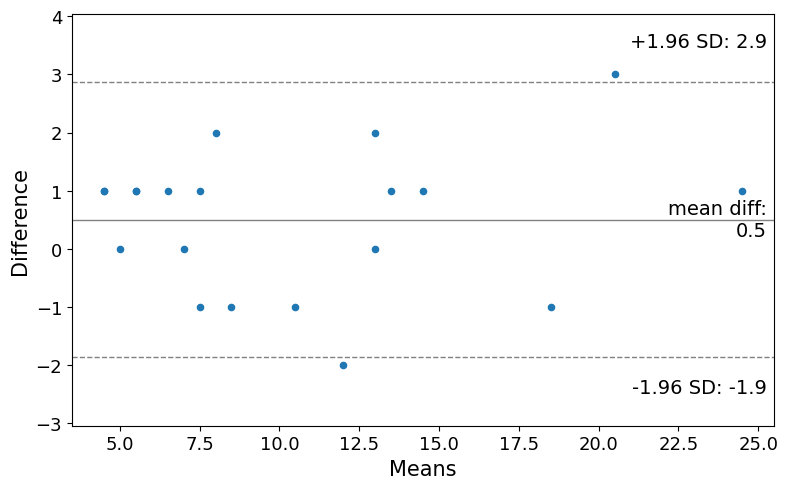

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Bland-Altman plot
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(df.A, df.B, ax = ax)

#display Bland-Altman plot
plt.show()


In [ ]:
# The x-axis of the plot displays the average measurement of the two instruments and the y-axis displays the difference in measurements between the two instruments.
# The black solid line represents the average difference in measurements between the two instruments while the two dashed lines represent the 95% confidence interval limits for the average difference.
# The average difference turns out to be 0.5 and the 95% confidence interval for the average difference is [-1.86, 2.86].


NameError: name 'Δ' is not defined